# Inżynieria lingwistyczna
Ten notebook jest oceniany półautomatycznie. Nie twórz ani nie usuwaj komórek - struktura notebooka musi zostać zachowana. Odpowiedź wypełnij tam gdzie jest na to wskazane miejsce - odpowiedzi w innych miejscach nie będą sprawdzane (nie są widoczne dla sprawdzającego w systemie).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

---

# Zadanie 1 - tokenizacja (12 pkt)

Jedną z nowoczesnych technik tokenizacji jest BPE - byte-pair encoding [1]. Technika ta polega na podzielenie słów na częste podsłowa (a'la morfemy?). W przeciwieństwie do podejść lingwistycznych, wymagających zwykle ręcznie napisanych reguł tworzenia morfemów czy nawet słowników lematów, BPE znajduje je heurystycznie poprzez wyznaczenie najczęstszych przylegających do siebie sekwencji znaków.

Algorytm przebiega w następujących krokach.
1. Podziel wszystkie słowa na symbole (początkowo pojedyncze znaki)
2. Wyznacz najczęściej występującą obok siebie parę symboli 
3. Stwórz nowy symbol będący konkatenacją dwóch najczęstszych symboli.

Uwaga 1: każde słowo zakończone jest specjalnym symbolem końca wyrazu.

Uwaga 2: tworzenie nowego symbolu nie powoduje usuniecie starego tj. zawsze jednym z możliwych symboli jest pojedynczy znak, ale jeśli można to stosujemy symbol dłuższy.

Przykład: korpus w którym występuje ,,ala'' 5 razy i ,,mama 10 razy''
1. Dzielimy słowa na symbole ,,a l a END'' ,,m a m a END''  gdzie END jest symbolem końca wyrazu.
2. Najczęstsza para obok siebie to ,,m a'' (20 razy)
3. Nowy symbol ,,ma''
4. Nowy podział ,,a l a END'' ,,ma ma END''
5. Najczęstsza para ,,ma ma'' (10 razy)
6. Nowy symbol ,,mama''
7. Nowy podział ,,a l a END'' ,,mama END''
8. itd.

W pliku ,,brown_clusters.tsv'' pierwsza kolumna to identyfikator skupienia (nie używamy w tym zadaniu), druga kolumna to wyrazy, a trzecia to ich liczności w pewnym korpusie tweetów. Zaimplementuj technikę BPE i przetesuj ją na tych słowach.

Parametrem algorytmu BPE jest `number_of_iterations` czyli liczba iteracji (łączeń symboli). Dodatkowo implementacja powinna mieć parametr `verbose`, którego wartość `True` powinna skutkować wypisywaniem na konsolę wykonywanych operacji (tj. łączeń).

[1] Sennrich, R., Haddow, B., and Birch, A. (2016). Neural machine translation of rare words with subword units. In ACL 2016.

In [1]:
from itertools import pairwise
from typing import Iterable
from collections import defaultdict
import pandas as pd

number_of_iterations = 10
brown_df = pd.read_csv('./brown_clusters.tsv', sep='\t', header=0, names=['cluster', 'word', 'count'])
def flatten(iterable: Iterable[Iterable]) -> Iterable:
  return (item for sublist in iterable for item in sublist)

def preform_bpe(brown_df: pd.DataFrame, number_of_iterations: int, verbose: bool = False) -> list[str]:
  """
  Funckcja przyjmuje ramkę w formacie analogicznym do obiektu brown_df (wczytany wyżej)
   oraz liczbę iteracji.
  Wyjściem funkcji powinna być lista słów z poszczególnymi tokenami/symbolami oddzielonymi spacją.
  Za znak końca wyrazu przyjmij END.
  """
  def replace(word: list[str]) -> list[str]:
    for i in reversed(range(len(word) - 1)):
      if word[i] == common[0] and word[i + 1] == common[1]:
        word[i] = new_symbol
        word.pop(i + 1)
    return word

  frame = brown_df.copy(True)

  frame.word = frame.word.astype(str).map(lambda word: [*word, 'END'])

  for iteration in range(number_of_iterations):
    # if verbose: print(f'Iteration: {iteration + 1}/{number_of_iterations}')

    counts = defaultdict(int)
    common: tuple[str, str] | None = None

    for row in frame.itertuples():
      for pair in pairwise(row.word):
        counts[pair] += row.count
        if counts[pair] > counts[common]: common = pair

    new_symbol = ''.join(common)
    # if verbose: print(f"New symbol: '{new_symbol}' from pair {common}")
    frame.word = frame.word.map(replace)

  return list(frame.word.map(' '.join))


Test implementacji:

In [46]:
from nose.tools import assert_list_equal
data = {'cluster': range(2), 'word': ['ala', 'mama'], 'count': [5, 10]}
df = pd.DataFrame(data, columns=['cluster', 'word', 'count'])
vocab = preform_bpe(df, 1)
assert_list_equal(vocab, ['a l a END', 'ma ma END'])

Spraw aby Twoja implementacja wypisywała kolejne łączone ze sobą symbole (parametr `verbose`) i uruchom Twoją funkcję na np. 50 iteracji, obserwując jakie tokeny są tworzone.

In [47]:
preform_bpe(brown_df, 50, verbose=True)

['\\ iEND',
 '/ i / END',
 't o d a y - iEND',
 'n ow iEND',
 '# you e v erEND',
 'i f in al l yEND',
 '「 iEND',
 '- i - END',
 'in e v aEND',
 '» iEND',
 'w ha t t a y aEND',
 'i i i i i i i i i iEND',
 '\ue6d1 END',
 'i k in d aEND',
 'l o l - iEND',
 'i a c t u al l yEND',
 'w a d d y aEND',
 '# a s l on g a s you END',
 'd o you END',
 '\u200e \u200b iEND',
 'i ̇ END',
 'ï END',
 '# l o l a t g i r l s w h oEND',
 '# r t i f you END',
 'i j s tEND',
 '« iEND',
 '• iEND',
 'w h o d aEND',
 'w ha d y aEND',
 ') iEND',
 '+ iEND',
 '# you r f a c e m a k e s m eEND',
 'i i i i i i i iEND',
 '` iEND',
 'i i i i i i iEND',
 'i al re a d yEND',
 '_ iEND',
 '# you m a k e m eEND',
 '* iEND',
 '| iEND',
 '# u r b o y f r i en d e v erEND',
 'w h en iEND',
 'ι END',
 "d on ' t c h aEND",
 "w h o ' d aEND",
 'd you END',
 'w ha d d a y aEND',
 'i on l yEND',
 'i j u s sEND',
 'i al w a y sEND',
 'i i i i iEND',
 'd on c h aEND',
 '( iEND',
 "d ' y aEND",
 'ı END',
 '# u e v erEND',
 'in e v e

- Jakie angielskie słowo jako pierwsze dostało swój własny token?

Pierwsze słowo angielskie, które dostało swój własny token to ,,in''.

- Jakie są zalety korzystania z tokenizacji BPE w kontekście tworzenia reprezentacji do problemu klasyfikacji tekstu (problem OOV, odnieś się do k-gramów i n-gramów)? Jakie są zalety BPE w przypadku przetwarzania różny rodzajów języków (np. fleksyjne, aglutynacyjne)?

- Zaleta mniejszej szansy na OOV, klasyczne k-gramy i n-gramy nie są w stanie wykrywać morfemów, a BPE jest w stanie wykryć morfemy, które są często powtarzane w tekście. Też jest to prawdziwe z innymi pod słowami.
- Mając języki, które mogą konstruować nieskończoną liczbę słów z nieskończonej liczby morfemów ( np. niemiecki z liczbami czy japoński z przymiotnikami [jeśli pisany w romanji]), które robi, BPE jest w stanie wykryć te morfemy i zastosować je do innych słów, a taki n-gram może tylko rozsmutnieć.
- W odróżnieniu od k-gramów wielkość słownika nie wybucha do ogromnych rozmiarów, a dobierając dobrą liczbę iteracji algorytmu BPE, mamy słownik o rozsądnym rozmiarze.
- Wysoka generalizacja i agnostyka języków przez te subwordy.

Wróć do implementacji i zakomentuj wypisywanie (funkcje print) informacji z funkcji `preform_bpe`.

# Zadanie 2 - klasyfikacja (15 pkt)

Poniższy kod powinien wczytać i ztokenizować zbiór danych dot. analizy wydźwięku. Jeśli nie masz biblioteki `nltk` musisz ją zainstalować.

In [2]:
from helpers import DataSet

training_set = DataSet(['./tweets.txt'])

Reading data set ['./resources/tweets.txt']


Poniżej znajdziesz przykład odczytu jednego tweeta z obiektu DataSet

In [3]:
for i in training_set.tweets:
  print(i.text)
  print(i.tokens)
  print(i.clazz)
  break

dear @Microsoft the newOoffice for Mac is great and all, but no Lync update? C'mon.
['dear', '@microsoft', 'the', 'newooffice', 'for', 'mac', 'is', 'great', 'and', 'all', ',', 'but', 'no', 'lync', 'update', '?', "c'mon", '.']
negative


Systemy IL często pracują z bardzo dużą liczbą cech, które są rzadkie np. cechy Bag-Of-Words, cechy n-gramowe itd. Powoduje to że klasyczna macierz zawierająca przykłady uczące ($n$) i cechy ($d$) rośnie do bardzo dużych rozmiarów ($nd$) nawet dla małych zbiorów uczących (w sensie liczby przykładów). Ponadto samo przechowywanie w pamięci słownika mapującego konkretne słowa/n-gramy na indeksy kolumn macierzy może być bardzo kosztowne pamięciowo przy dużych rozmiarach słownika.

Istnieje jednak technika, która pozwala nam na ominięcie tej przeszkody: haszowanie cech. Opis tej techniki znajdziesz na stronie:  https://en.wikipedia.org/wiki/Feature_hashing Jest ona też implementowana w obiekcie `sklearn.feature_extraction.FeatureHasher`. Zapoznaj się z opisem techniki i wykonaj poniższe polecenia.

- Wykorzystując haszowanie cech wytrenuj wybrany klasyfikator (najlepiej taki, który się szybko liczy) na zbiorze uczącym dla cech Bag-of-words (możesz też spróbować cechy n-gramowe). Możesz wykorzystać gotową tokenizację we właściwości `.tokens`.

In [4]:
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

df = pd.DataFrame(((tweet.tokens, tweet.clazz) for tweet in training_set.tweets), columns=['x', 'y'])

x_train, x_test, y_train, y_test = train_test_split(
  FeatureHasher(n_features=0xAbc, input_type='string').transform(df.x),
  df.y,
  test_size=0.2,
  random_state=0xDeadBeaf
)

SGDClassifier().fit(x_train, y_train).score(x_test, y_test)

0.5228937728937729

- Stwórz wykres zależności wybranej miary klasyfikacji od wymiarów macierzy danych (chodzi o liczbę cech do których haszujemy cechy oryginalne). Wystarczy przetestować kilka (>=4) wybranych wartości na skali logarytmicznej.

1
10
100
1000
10000
100000
1000000
10000000
[1, 10, 100, 1000, 10000, 100000, 1000000, 10000000] [0.44505494505494503, 0.4542124542124542, 0.5201465201465202, 0.532051282051282, 0.5283882783882784, 0.5714285714285714, 0.5659340659340659, 0.5622710622710623]


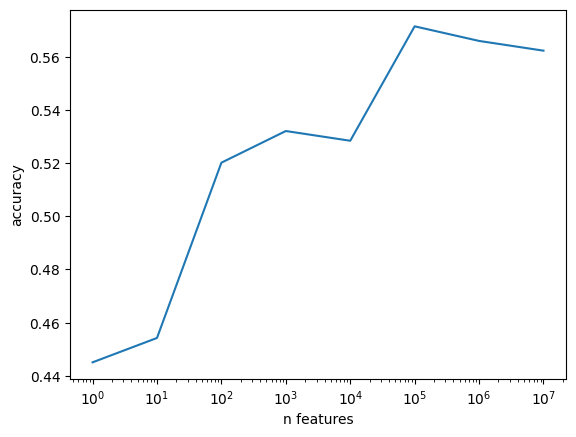

In [51]:
import matplotlib.pyplot as plt

def find_score(n_features: int):
  print(n_features)
  x_train, x_test, y_train, y_test = train_test_split(
    FeatureHasher(n_features=n_features, input_type='string').transform(df.x),
    df.y,
    test_size=0.2,
    random_state=0xDeadBeaf
  )

  return SGDClassifier().fit(x_train, y_train).score(x_test, y_test)


x = [pow(10, n) for n in range(8)]
y = list(map(find_score, x))
print(x, y)

plt.plot(x, y)
plt.xscale('log')
plt.ylabel('trafność')
plt.xlabel('Liczba cech')
plt.show()

 - Obserwując stworzony wykres - skomentuj. Jak dużo jakości klasyfikacji się traci (albo zyskuje?) korzystając z mniejszej liczby haszowanych cech? Często klasyfikatory bardzo dobrze działają nawet przy liczbie haszowanych cech dla których na pewno istnieją konflikty cech oryginalnych - jak myślisz dlaczego? (Pomyśl o interpretacji takich skonfliktowanych cech).

Jakością klasyfikacji zyskujemy całkiem sporo (z 0.48 do 0.57) jednak możemy zobaczyć pewne spłaszczenie i stratę zysków powyżej pewnego progu cech (1e5). Korzystając, z małej liczby haszowanych cech tracimy celność (ok te 10%), więc możemy je podbić do wyższej liczby ( te 1e5 ). Gdy mamy mało cech możemy wchodzić na kolizje ze względu na podobieństwa hashowanych wartości.

 - W poprzednim zadaniu wczytałeś wynik grupowania Browna do pamięci. Wytrenuj klasyfikator na reprezentacji ,,Bag-of-clusters'' tj. w kolumnach zamiast słów/n-gramów będziesz miał grupy.

In [32]:
import numpy as np

def create_bagging(df: pd.DataFrame) -> list[int]:
  clusters = df.cluster.unique()
  cluster_encoding = dict(zip(clusters, np.eye(len(clusters))))
  cluster_by_word = dict(zip(df.word, map(cluster_encoding.get,  df.cluster)))

  return [
    sum(map(cluster_by_word.get, filter(cluster_by_word.__contains__, tweet.tokens)))
    for tweet in training_set.tweets
  ]

X = create_bagging(brown_df)
y = [tweet.clazz for tweet in training_set.tweets]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0xDeafBeaf)
SGDClassifier().fit(x_train, y_train).score(x_test, y_test)

0.5393772893772893

- Podsumuj eksperymenty: poznałeś dwie możliwości ograniczenia liczby cech - zastąpienie słów ich grupami i haszowanie cech. Jakie są wady i zalety obydwu podejść?

Oba podejścia wyglądają dobrze, otrzymujemy różne wyniki, ale oba są lepsze od oryginalnego. Celność klasyfikacji z SGD i hashem jest lepsze, ale zmienić klasyfikator na SVC i jest odwrotnie, więc nie widzę reguły.

Haszowanie cech:
- nie wymaga przechowywania słownika
- szybkie obliczeniowo (chociaż przy za dużej liczbie cech zaczyna bardzo spowalniać >1e5)
- są kolizje
- haszowanie nie jest odwracalne

Zastąpienie słów ich grupami:
- grupowania znaczeniowe ( te drzewo Browna z wykładu )
- nie ma kolizji, ale są słowa spoza słownika (np. słowa z nowych tweetów)
- wymaga przechowywania słownika ( co też może być zaletą, bo możemy go wykorzystać do innych celów )